## Bidirectional Long Short-Term Memory (Bi - LSTM):
Bi-LSTM is an extension of the traditional LSTM (Long Short-Term Memory) network, designed to take advantage of both past and future contextual information when processing sequential data, such as text.

 - In a standard LSTM, the model processes input sequences from the beginning to the end, capturing information about the past context of each word. However, it may overlook important information from the future context of the word. 
 - Bi-LSTM addresses this limitation by processing input sequences in both forward and backward directions simultaneously.
 - It is effective in tasks that require understanding the meaning and context of words in a sentence, such as text classification, sentiment analysis, and machine translation. 
 - Bi-LSTM has shown to be powerful in capturing long-range dependencies, making it a valuable tool for various NLP applications.

By leveraging the bidirectional processing of Bi-LSTM, the model can effectively capture semantic context and dependencies in the text, making it a promising choice for fake news detection and other natural language processing tasks.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import re, string, unicodedata
from string import punctuation
# String containing all the ASCII punctuation 
# characters like !, ", #, $, %, and so on. 
from termcolor import colored
# The colored function from this module is used to add color to text 
# output when printing to the terminal.
from collections import Counter
# The Counter is a dictionary subclass that counts the occurrences of 
# elements in a collection (e.g., a list or a string) and returns the 
# results as a dictionary.
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import set_config
set_config(print_changed_only = False)
import keras
import tensorflow as tf
from keras.callbacks import ReduceLROnPlateau
# Used to automatically adjust the learning rate during training to 
# optimize the performance of the model.
from keras.preprocessing import text, sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
import nltk
from nltk.corpus import stopwords
from textblob import Word
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag
from nltk.corpus import wordnet
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from bs4 import BeautifulSoup
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arvin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\arvin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\arvin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
fake = pd.read_csv('Fake.csv')
true = pd.read_csv('True.csv')
GLOVE_EMBEDDING = 'glove.twitter.27B.100d.txt'
print(fake.shape)
fake.head()

(23481, 4)


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [3]:
print(true.shape)
true.head()

(21417, 4)


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
fake['Label'] = 0
true['Label'] = 1
df = pd.concat([fake, true], ignore_index = True, sort = False)
df = shuffle(df).reset_index(drop = True)
print(df.shape)
df.head()

(44898, 5)


,title,text,subject,date,Label
0,Exclusive: Trump aides’ bid to plug leaks crea...,WASHINGTON (Reuters) - President Donald Trump’...,politicsNews,"March 3, 2017",1
1,Trump’s Ignorance Is Going To Turn The GOP Co...,"In a little over two weeks, the Republican Pa...",News,"July 1, 2016",0
2,U.S. sees increased activity by Chinese bomber...,WASHINGTON (Reuters) - The United States is aw...,politicsNews,"April 20, 2017",1
3,TRUMP SLAMS ABC For Ignoring Pro-Life March Wh...,Watch:MUIR: And as we walked through the White...,left-news,"Jan 28, 2017",0
4,Bernie Sanders Won The Nevada Caucus On Satur...,Bernie Sanders has won the Clark County Democr...,News,"April 3, 2016",0


In [5]:
# Calculate & Delete the duplicates:
print("Number of Duplicates:", df.duplicated().sum())
df.drop_duplicates(inplace = True)
print(df.shape)

Number of Duplicates: 209
(44689, 5)


### Data Cleaning:

<AxesSubplot:xlabel='Label', ylabel='count'>

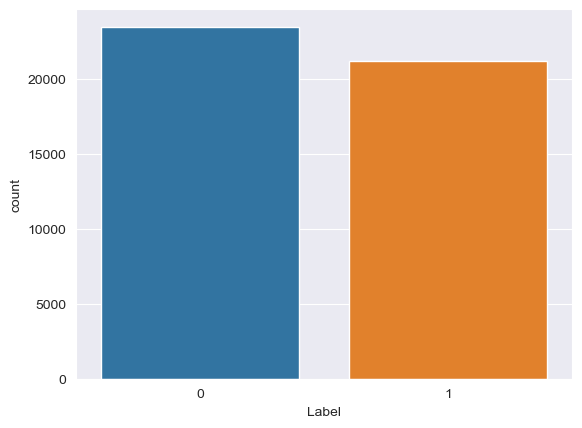

In [6]:
sns.set_style("darkgrid")
sns.countplot(df['Label'])

**StopWords:**

In natural language processing (NLP), stopwords are common words that are typically removed from text during text preprocessing. These words are considered to have little semantic meaning or importance in understanding the overall context of a sentence or document. Examples of stopwords in English include "the", "and", "is", "of", "in", "a", "an", "to" and so on.

In [7]:
stop = set(stopwords.words('english'))
# Get a set of common English stopwords. 
# The stop variable will now hold this set of stopwords.
punctuation = list(string.punctuation)
# This line imports the string module and gets a list 
# of punctuation symbols using string.punctuation
stop.update(punctuation)
# This line updates the 'stop' set by adding all the punctuation 
# symbols to it. 

def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# Removing the square brackets:
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# Removing URLs:
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)

# Removing the stopwords from text:
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

# Removing the noisy text:
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text

# Apply function on review column:
df['text'] = df['text'].apply(denoise_text)

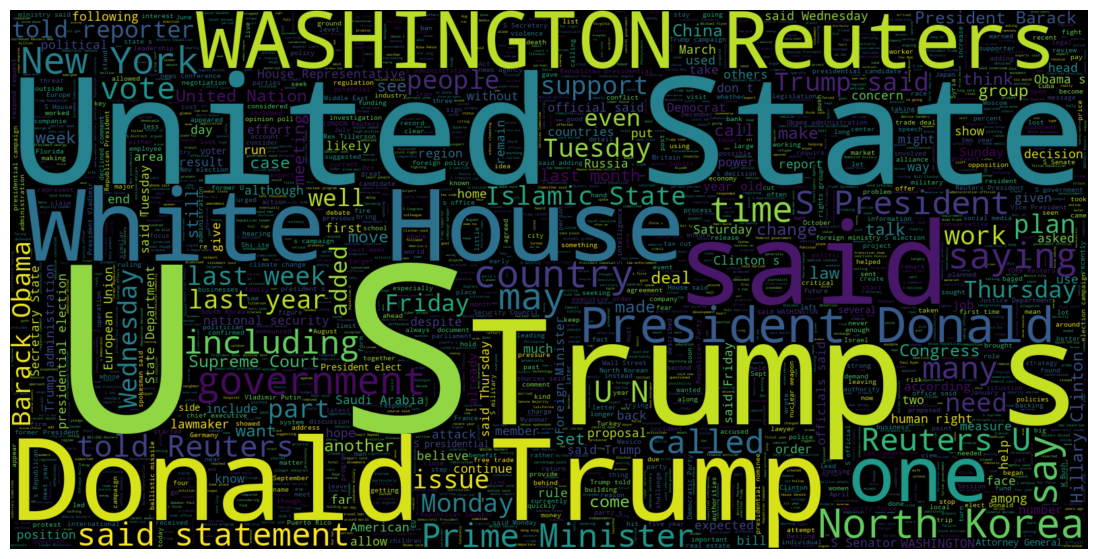

In [8]:
# WordCloud For Real Text:
plt.figure(figsize = (15, 7))
wc = WordCloud(max_words = 2000, width = 1600, height = 800, stopwords = STOPWORDS).generate(" ".join(df[df['Label'] == 1].text))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")
plt.show()

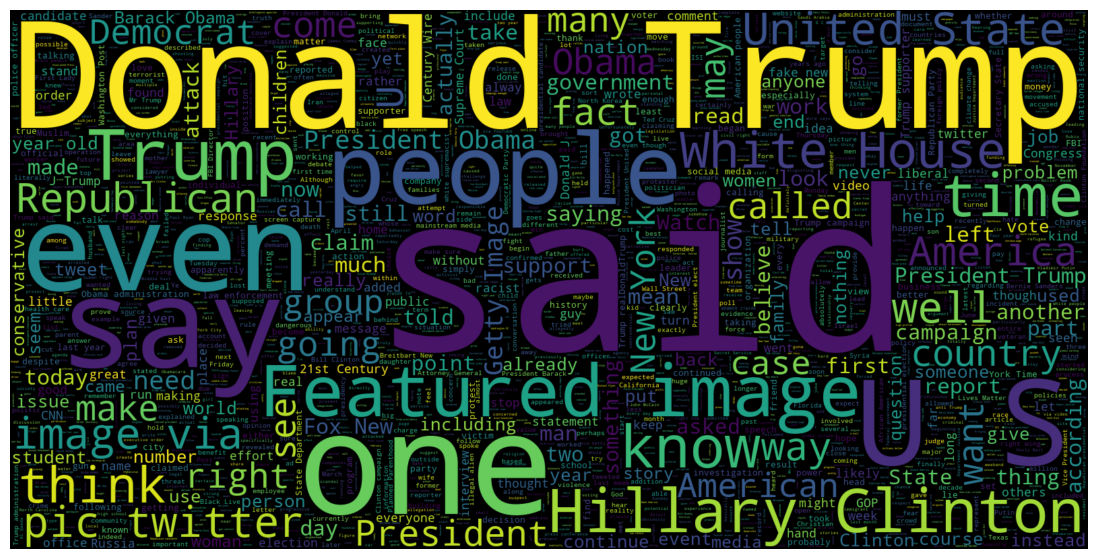

In [9]:
# WordCloud For Fake Text:
plt.figure(figsize = (15, 7))
wc = WordCloud(max_words = 2000, width = 1600, height = 800, stopwords = STOPWORDS).generate(" ".join(df[df['Label'] == 0].text))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [10]:
# Get Corpus:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(df['text'])
corpus[:5]

['WASHINGTON', '(Reuters)', 'President', 'Donald', 'Trump’s']

In [11]:
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'Trump': 100870,
 'said': 92268,
 'would': 53999,
 'U.S.': 45687,
 'people': 32819,
 'President': 32114,
 'also': 30114,
 'one': 29176,
 'Donald': 26941,
 'said.': 25929}

In [12]:
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range = (g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis = 0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]

**Unigram Analysis:**

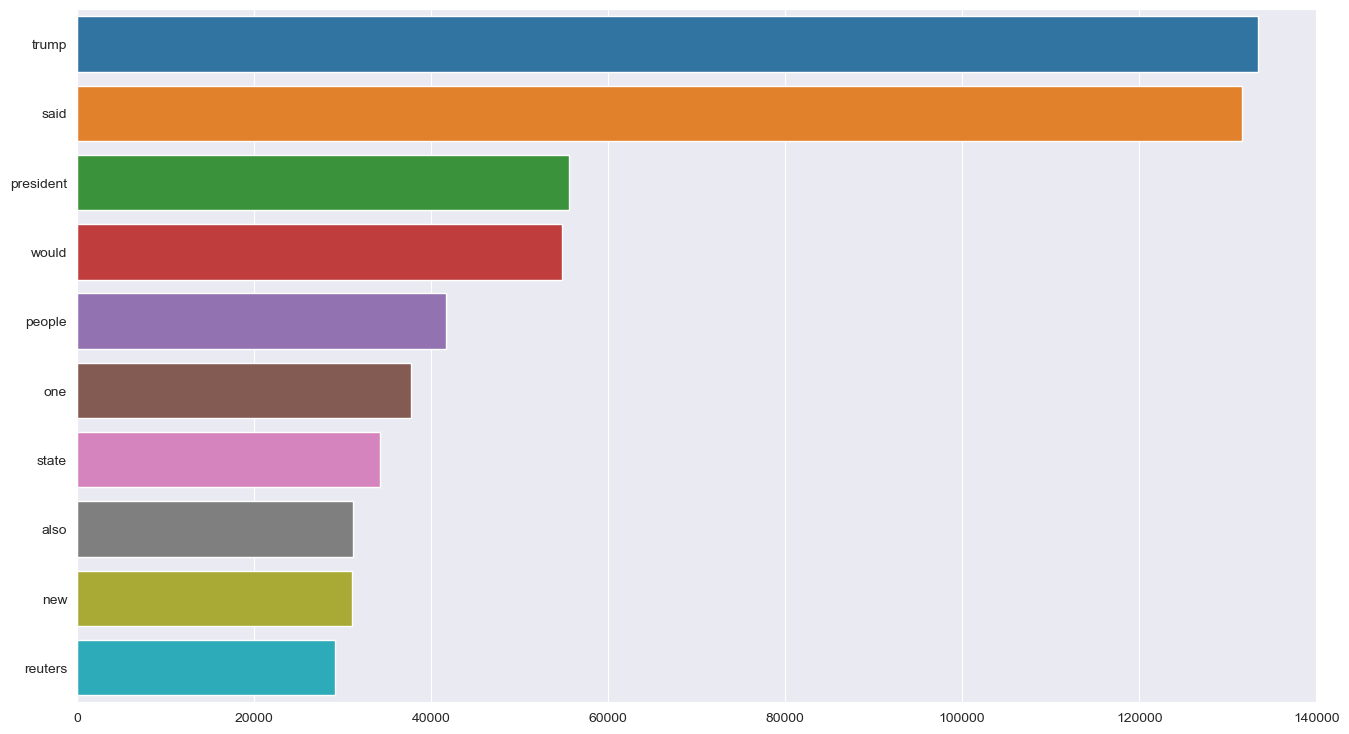

In [13]:
plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(df.text,10,1)
most_common_uni = dict(most_common_uni)
sns.barplot(x = list(most_common_uni.values()), y = list(most_common_uni.keys()))
plt.show()

**Bigram Analysis:**

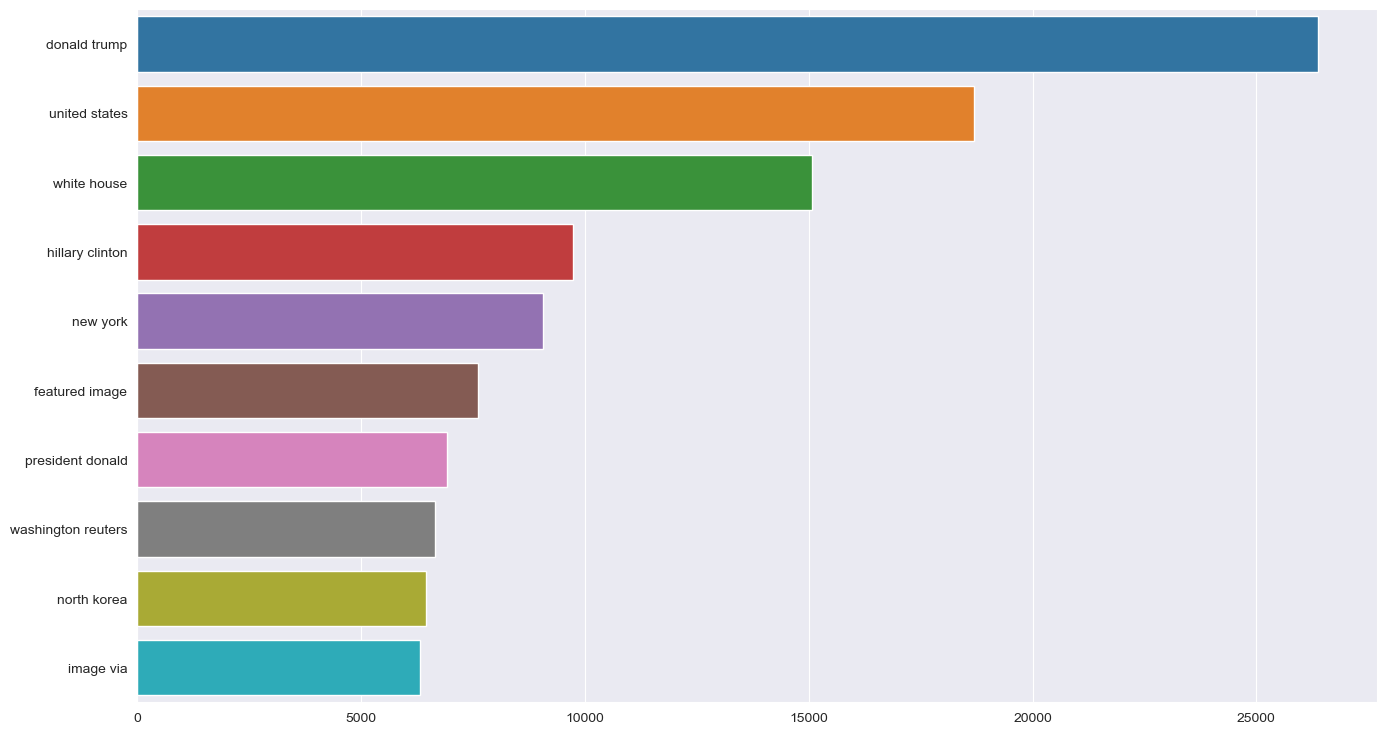

In [14]:
plt.figure(figsize = (16,9))
most_common_bi = get_top_text_ngrams(df.text,10,2)
most_common_bi = dict(most_common_bi)
sns.barplot(x = list(most_common_bi.values()), y = list(most_common_bi.keys()))
plt.show()

**Trigram Analysis:**

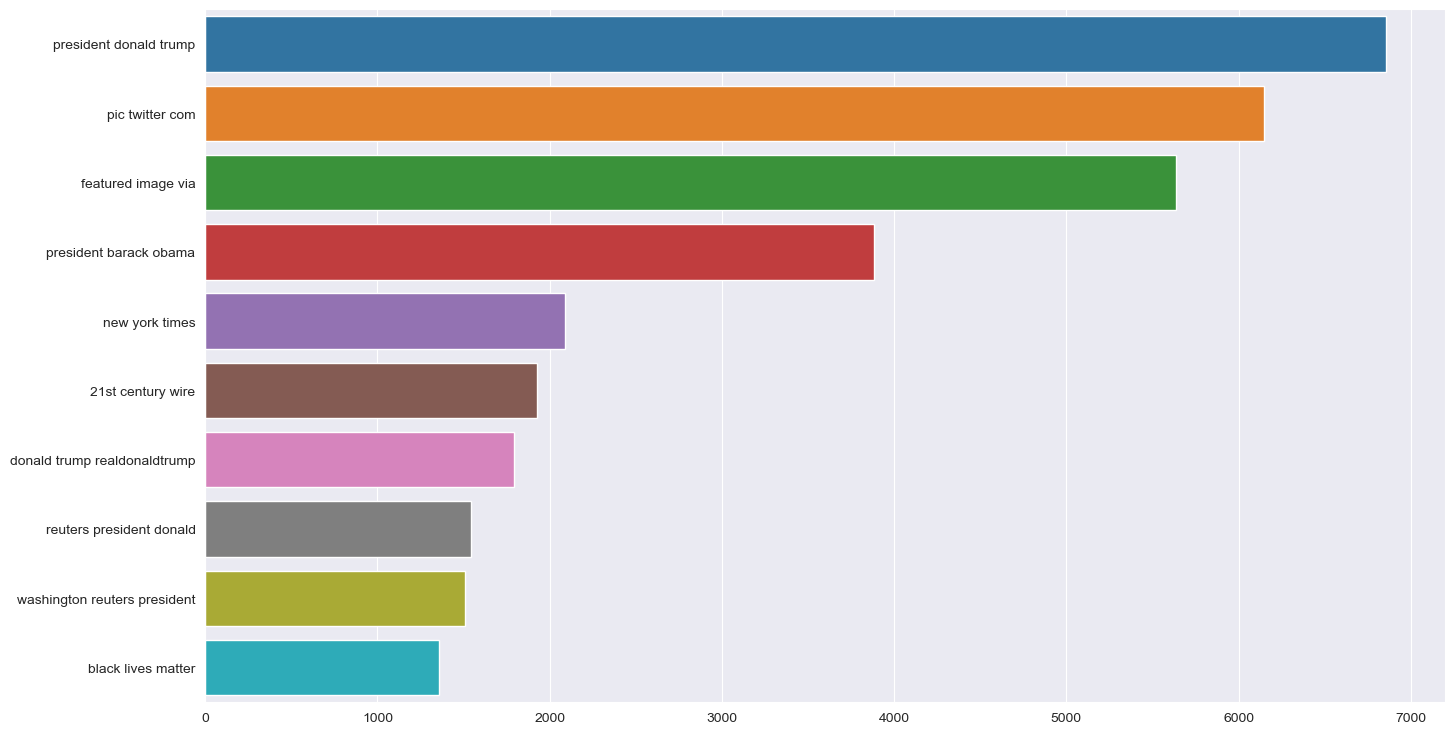

In [15]:
plt.figure(figsize = (16,9))
most_common_tri = get_top_text_ngrams(df.text,10,3)
most_common_tri = dict(most_common_tri)
sns.barplot(x = list(most_common_tri.values()), y = list(most_common_tri.keys()))
plt.show()

### Model Training:

In [16]:
X = df['text']
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 11)
print("Shape of the Training data:", X_train.shape)
print("Shape of the Testing data:", X_test.shape)

Shape of the Training data: (35751,)
Shape of the Testing data: (8938,)


In [17]:
tokenizer = Tokenizer(num_words = 10000)
tokenizer.fit_on_texts(X_train)
tokenized_train = tokenizer.texts_to_sequences(X_train)
tokenized_test = tokenizer.texts_to_sequences(X_test)
train_x = tf.keras.preprocessing.sequence.pad_sequences(tokenized_train, maxlen = 300)
test_x = tf.keras.preprocessing.sequence.pad_sequences(tokenized_test, maxlen = 300)

def get_coefs(word, *arr):
    return word, np.asarray(arr, dtype = "float32")
embeddings_index = dict(get_coefs(*g.rstrip().rsplit(" ")) for g in open(GLOVE_EMBEDDING, encoding = 'utf-8'))
embeddings = np.stack(embeddings_index.values())
embedding_mean, embedding_std = embeddings.mean(), embeddings.std()
embedding_size = embeddings.shape[1]

word_index = tokenizer.word_index
nb_words = min(10000, len(word_index))

embedding_matrix = embedding_matrix = np.random.normal(embedding_mean, embedding_std, (nb_words, embedding_size))
for word, i in word_index.items():
    if i >= 10000:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        
lr_reduce = ReduceLROnPlateau(monitor = "val_accuracy", patience = 2, factor = 0.5, min_lr = 0.00001)

In [18]:
model = Sequential()
model.add(Embedding(10000, output_dim = 100, weights = [embedding_matrix], input_length = 300, trainable = False))
model.add(Bidirectional(LSTM(150))),
model.add(Dense(units = 32, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 100)          1000000   
                                                                 
 bidirectional (Bidirectiona  (None, 300)              301200    
 l)                                                              
                                                                 
 dense (Dense)               (None, 32)                9632      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,310,865
Trainable params: 310,865
Non-trainable params: 1,000,000
_________________________________________________________________


In [19]:
# Compile the model:
model.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.01),
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

history = model.fit(train_x,
                    y_train,
                    batch_size = 128,
                    validation_data = (test_x, y_test),
                    epochs = 5,
                    callbacks = [lr_reduce])

Epoch 1/5
280/280 [==============================] - 1251s 4s/step - loss: 0.1743 - accuracy: 0.9303 - val_loss: 0.0814 - val_accuracy: 0.9696 - lr: 0.0010
Epoch 2/5
280/280 [==============================] - 1399s 5s/step - loss: 0.0854 - accuracy: 0.9702 - val_loss: 0.0550 - val_accuracy: 0.9817 - lr: 0.0010
Epoch 3/5
280/280 [==============================] - 1299s 5s/step - loss: 0.0469 - accuracy: 0.9835 - val_loss: 0.0194 - val_accuracy: 0.9936 - lr: 0.0010
Epoch 4/5
280/280 [==============================] - 1472s 5s/step - loss: 0.0172 - accuracy: 0.9938 - val_loss: 0.0219 - val_accuracy: 0.9935 - lr: 0.0010
Epoch 5/5
280/280 [==============================] - 1513s 5s/step - loss: 0.0119 - accuracy: 0.9963 - val_loss: 0.0130 - val_accuracy: 0.9957 - lr: 0.0010


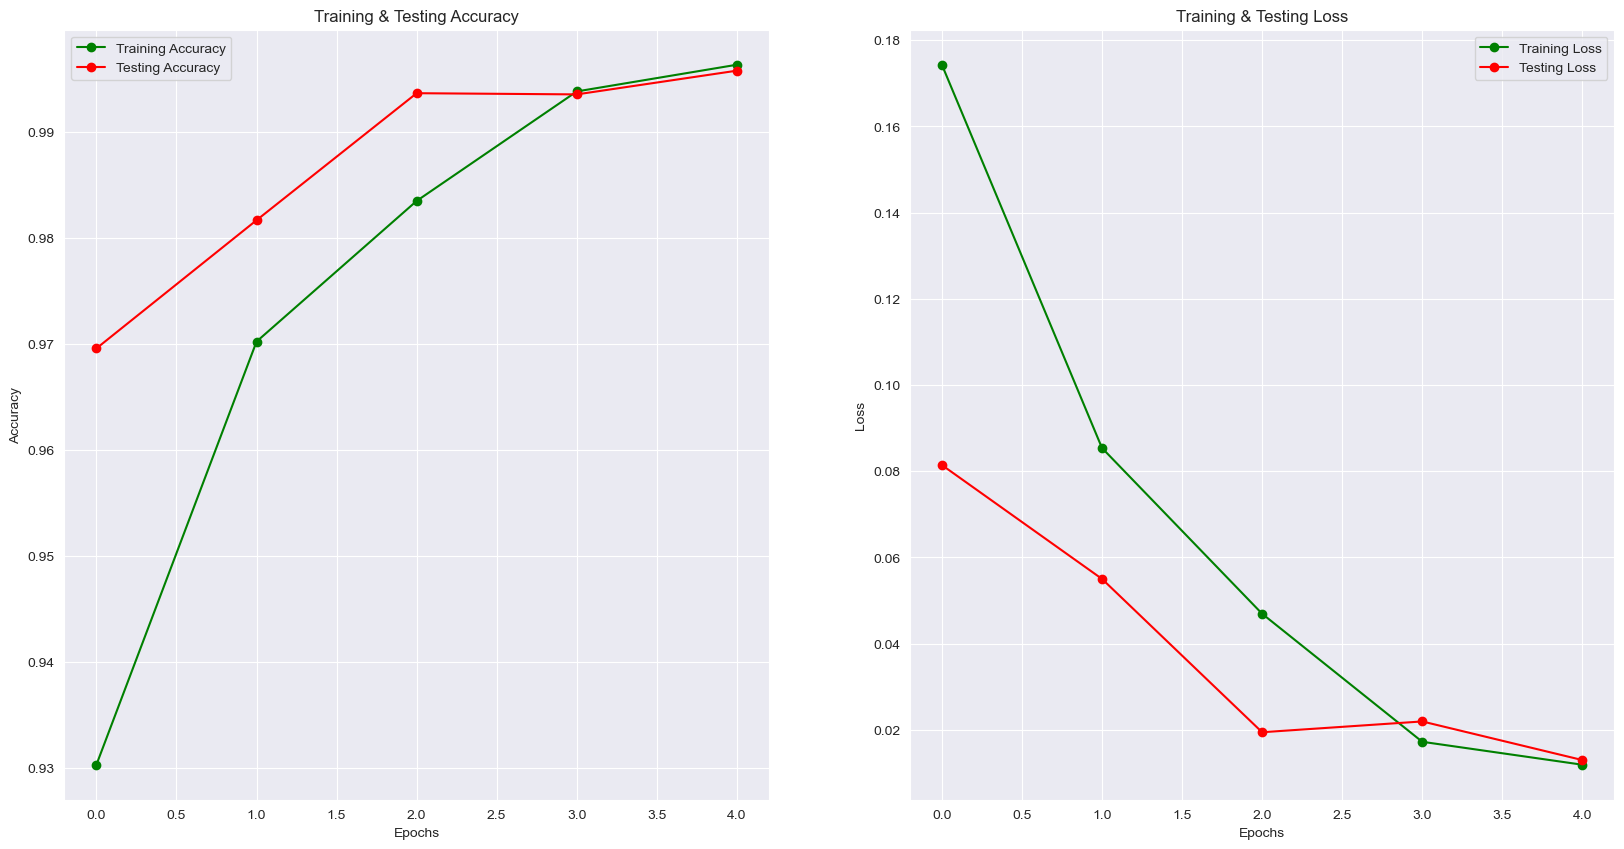

In [20]:
epochs = [i for i in range(5)]
fig, ax = plt.subplots(1, 2)
train_acc = history.history["accuracy"]
train_loss = history.history["loss"]
val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]
fig.set_size_inches(20, 10)

ax[0].plot(epochs, train_acc, "go-", label = "Training Accuracy")
ax[0].plot(epochs, val_acc, "ro-", label = "Testing Accuracy")
ax[0].set_title("Training & Testing Accuracy")
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs, train_loss, "go-", label = "Training Loss")
ax[1].plot(epochs, val_loss, "ro-", label = "Testing Loss")
ax[1].set_title("Training & Testing Loss")
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [21]:
pred = model.predict(test_x)
threshold = 0.5
pred = (pred > threshold).astype(int)
pred[:5]

280/280 [==============================] - 57s 202ms/step


array([[0],
       [0],
       [0],
       [0],
       [1]])

In [22]:
print(classification_report(y_test, pred, target_names = ['Fake', 'Not Fake']))

              precision    recall  f1-score   support

        Fake       1.00      0.99      1.00      4699
    Not Fake       0.99      1.00      1.00      4239

    accuracy                           1.00      8938
   macro avg       1.00      1.00      1.00      8938
weighted avg       1.00      1.00      1.00      8938



In [23]:
print("Accuracy of the model on Training Data is - " , model.evaluate(train_x,y_train)[1]*100 , "%")
print("*********************************************************************************************")
print("Accuracy of the model on Testing Data is - " , model.evaluate(test_x,y_test)[1]*100 , "%")

1118/1118 [==============================] - 205s 183ms/step - loss: 0.0080 - accuracy: 0.9971
Accuracy of the model on Training Data is -  99.71189498901367 %
*********************************************************************************************
280/280 [==============================] - 50s 180ms/step - loss: 0.0130 - accuracy: 0.9957
Accuracy of the model on Testing Data is -  99.57484602928162 %


In [24]:
cm = confusion_matrix(y_test,pred)
cm = pd.DataFrame(cm , index = ['Fake','Original'] , columns = ['Fake','Original'])
cm

,Fake,Original
Fake,4665,34
Original,4,4235


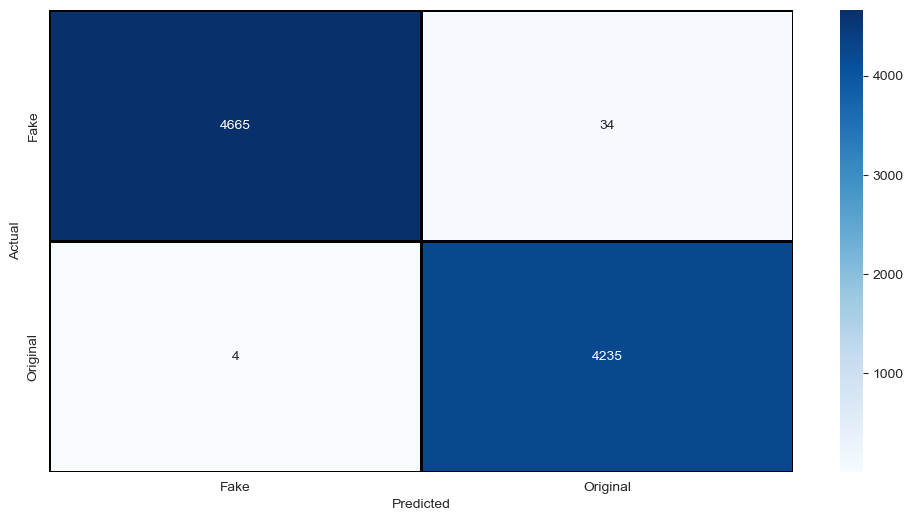

In [25]:
plt.figure(figsize = (12,6))
sns.heatmap(cm, cmap= "Blues", linecolor = 'black', linewidth = 1, annot = True, fmt='', xticklabels = ['Fake','Original'], yticklabels = ['Fake','Original'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()